## Importacion de librerias

In [1]:
import boto3
import pandas as pd
from io import StringIO, BytesIO 
from datetime import datetime, timedelta

In [2]:
arg_date = '2022-03-01'

In [3]:
arg_date_dt = datetime.strptime(arg_date, '%Y-%m-%d').date() - timedelta(days=1)

In [4]:
arg_date_dt

datetime.date(2022, 2, 28)

## Accedemos al servicio de amazon S3 y al bucket deutsche-boerse-xetra-pds

In [5]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('deutsche-boerse-xetra-pds')

In [6]:
objects = [obj for obj in bucket.objects.all() if datetime.strptime(obj.key.split('/')[0], '%Y-%m-%d').date() >= arg_date_dt]

In [7]:
objects

[s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR00.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR01.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR02.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR03.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR04.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR05.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR06.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR07.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pds', key='2022-02-28/2022-02-28_BINS_XETR08.csv'),
 s3.ObjectSummary(bucket_name='deutsche-boerse-xetra-pd

In [8]:
csv_obj_init = bucket.Object(key=objects[0].key).get().get('Body').read().decode('utf-8')
data = StringIO(csv_obj_init)
df_init = pd.read_csv(data, delimiter=',')

In [9]:
df_init.columns

Index(['ISIN', 'Mnemonic', 'SecurityDesc', 'SecurityType', 'Currency',
       'SecurityID', 'Date', 'Time', 'StartPrice', 'MaxPrice', 'MinPrice',
       'EndPrice', 'TradedVolume', 'NumberOfTrades'],
      dtype='object')

## Creamos un dataFrame con pandas y le asignamos las columas para poseriormente medianete un for pasarle la informacion

In [10]:
df_all = pd.DataFrame(columns=df_init.columns)
for obj in objects:
    csv_obj = bucket.Object(key=obj.key).get().get('Body').read().decode('utf-8')
    data = StringIO(csv_obj)
    df = pd.read_csv(data, delimiter=',')
    df_all = df_all.append(df, ignore_index=True)

C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppDat

C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppDat

C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)
C:\Users\Rizo\AppData\Local\Temp\ipykernel_7180\155816908.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df, ignore_index=True)


In [11]:
df_all

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
0,AT0000A0E9W5,SANT,S+T AG O.N.,Common stock,EUR,2504159,2022-02-28,08:00,13.88,13.88,13.88,13.88,63,1
1,DE000A0DJ6J9,S92,SMA SOLAR TECHNOL.AG,Common stock,EUR,2504287,2022-02-28,08:00,29.0,29.14,29.0,29.14,6004,29
2,DE000A0D6554,NDX1,NORDEX SE O.N.,Common stock,EUR,2504290,2022-02-28,08:00,13.76,13.88,13.76,13.8,49560,55
3,DE000A0D9PT0,MTX,MTU AERO ENGINES NA O.N.,Common stock,EUR,2504297,2022-02-28,08:00,212.0,212.0,210.4,210.6,17455,40
4,DE000A0JL9W6,VBK,VERBIO VER.BIOENERGIE ON,Common stock,EUR,2504343,2022-02-28,08:00,66.2,66.25,65.35,66.25,10884,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400397,LU1923627332,RUSL,MUL-LYX.MSCI RUSSI.DIS.LS,ETF,EUR,5424594,2022-03-02,16:52,8.3,8.3,8.3,8.3,288,2
400398,IE00BDS67326,EM1C,VANECK J.P. EM BO UC.ETF,ETF,EUR,2505405,2022-03-02,16:53,53.436,53.436,53.436,53.436,2,2
400399,US03073E1055,ABG,"AMERISOURCEBERGEN DL-,01",Common stock,EUR,5988600,2022-03-02,20:30,127.0,127.0,127.0,127.0,0,1
400400,US7502361014,RAG,"RADIAN GRP INC. DL-,001",Common stock,EUR,6014117,2022-03-02,20:30,20.8,20.8,20.8,20.8,0,1


## Extraemos las columnas que solo consumiremos para la practica y lo asignamos al dataFrame df_all

In [12]:
columns = ['ISIN','Date','Time','StartPrice','EndPrice']
df_all = df_all.loc[:, columns]

In [13]:
df_all

,ISIN,Date,Time,StartPrice,EndPrice
0,AT0000A0E9W5,2022-02-28,08:00,13.88,13.88
1,DE000A0DJ6J9,2022-02-28,08:00,29.0,29.14
2,DE000A0D6554,2022-02-28,08:00,13.76,13.8
3,DE000A0D9PT0,2022-02-28,08:00,212.0,210.6
4,DE000A0JL9W6,2022-02-28,08:00,66.2,66.25
...,...,...,...,...,...
400397,LU1923627332,2022-03-02,16:52,8.3,8.3
400398,IE00BDS67326,2022-03-02,16:53,53.436,53.436
400399,US03073E1055,2022-03-02,20:30,127.0,127.0
400400,US7502361014,2022-03-02,20:30,20.8,20.8


In [14]:
df_all.dropna(inplace=True)

In [15]:
df_all.shape


(400402, 5)

##  Realizamos la filtracion de los datos con la columa de Time desde las 8:00 a 12:00


In [16]:
df_all= df_all.loc[(df_all["Time"] >= '08:00') & (df_all["Time"]<='12:00') , ["ISIN", "Date","Time","StartPrice","EndPrice"]]

In [17]:
df_all

,ISIN,Date,Time,StartPrice,EndPrice
0,AT0000A0E9W5,2022-02-28,08:00,13.88,13.88
1,DE000A0DJ6J9,2022-02-28,08:00,29.0,29.14
2,DE000A0D6554,2022-02-28,08:00,13.76,13.8
3,DE000A0D9PT0,2022-02-28,08:00,212.0,210.6
4,DE000A0JL9W6,2022-02-28,08:00,66.2,66.25
...,...,...,...,...,...
326635,IE00BMFNW783,2022-03-02,12:00,5.78,5.785
326636,DE000A3CQ7F4,2022-03-02,12:00,10.27,10.27
326637,IE000H1H16W5,2022-03-02,12:00,4.406,4.4115
326638,LU2278080713,2022-03-02,12:00,10.042,10.042


## Obtener por ISIN

In [18]:
df_all[df_all['ISIN']=='AT0000A0E9W5']

,ISIN,Date,Time,StartPrice,EndPrice
0,AT0000A0E9W5,2022-02-28,08:00,13.88,13.88
2500,AT0000A0E9W5,2022-02-28,08:05,13.88,13.99
2813,AT0000A0E9W5,2022-02-28,08:06,13.97,13.89
4103,AT0000A0E9W5,2022-02-28,08:10,13.89,13.89
9235,AT0000A0E9W5,2022-02-28,08:27,14.03,14.03
...,...,...,...,...,...
322789,AT0000A0E9W5,2022-03-02,11:43,13.81,13.9
323080,AT0000A0E9W5,2022-03-02,11:44,13.91,13.87
323316,AT0000A0E9W5,2022-03-02,11:45,13.9,13.91
323517,AT0000A0E9W5,2022-03-02,11:46,13.86,13.86


## Realizar la desviacion estandar de starPrice y endPrice. Agregandola al dataFrame en una nueva columna

In [20]:
df_all['std']=df_all[["StartPrice", "EndPrice"]].std(axis=1)

In [21]:
df_all

,ISIN,Date,Time,StartPrice,EndPrice,std
0,AT0000A0E9W5,2022-02-28,08:00,13.88,13.88,0.000000
1,DE000A0DJ6J9,2022-02-28,08:00,29.0,29.14,0.098995
2,DE000A0D6554,2022-02-28,08:00,13.76,13.8,0.028284
3,DE000A0D9PT0,2022-02-28,08:00,212.0,210.6,0.989949
4,DE000A0JL9W6,2022-02-28,08:00,66.2,66.25,0.035355
...,...,...,...,...,...,...
326635,IE00BMFNW783,2022-03-02,12:00,5.78,5.785,0.003536
326636,DE000A3CQ7F4,2022-03-02,12:00,10.27,10.27,0.000000
326637,IE000H1H16W5,2022-03-02,12:00,4.406,4.4115,0.003889
326638,LU2278080713,2022-03-02,12:00,10.042,10.042,0.000000


## Realizar transformacion a pesos del EndPrice a pesos mexicanos del EndPrice utilizando taza de cambio un valor predefinido

In [22]:
df_all["EndPrice_MXN"]= df_all["EndPrice"] * 22.94

In [24]:
df_all

,ISIN,Date,Time,StartPrice,EndPrice,std,EndPrice_MXN
0,AT0000A0E9W5,2022-02-28,08:00,13.88,13.88,0.000000,318.4072
1,DE000A0DJ6J9,2022-02-28,08:00,29.0,29.14,0.098995,668.4716
2,DE000A0D6554,2022-02-28,08:00,13.76,13.8,0.028284,316.572
3,DE000A0D9PT0,2022-02-28,08:00,212.0,210.6,0.989949,4831.164
4,DE000A0JL9W6,2022-02-28,08:00,66.2,66.25,0.035355,1519.775
...,...,...,...,...,...,...,...
326635,IE00BMFNW783,2022-03-02,12:00,5.78,5.785,0.003536,132.7079
326636,DE000A3CQ7F4,2022-03-02,12:00,10.27,10.27,0.000000,235.5938
326637,IE000H1H16W5,2022-03-02,12:00,4.406,4.4115,0.003889,101.19981
326638,LU2278080713,2022-03-02,12:00,10.042,10.042,0.000000,230.36348


## Aplicar una regresión lineal o no lineal (dependiendo del caso) para hacer una predicción del EndPrince, y la ventana de tiempo asignada.


In [364]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [365]:
X = df_all['EndPrice']
y = df_all['Time'].replace({':':'.'}, regex=True).astype(float)

In [366]:
y=y.head(n=50000)
X=X.head(n=50000)

In [367]:
y

0         8.00
1         8.00
2         8.00
3         8.00
4         8.00
         ...  
49995    11.17
49996    11.17
49997    11.17
49998    11.17
49999    11.17
Name: Time, Length: 50000, dtype: float64

## Graficacion de datos sin prediccion

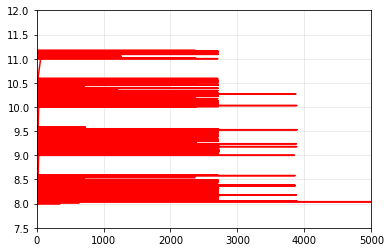

In [368]:
plt.xlim(0, 5000)
plt.ylim(7.5, 12)
plt.plot(X,y, color="red")
plt.grid(alpha=0.3)

In [369]:
y=y.reset_index().values
X=X.reset_index().values

In [370]:
X_train = X[:-40000]
X_test = y[-40000:]

In [371]:
y_train =y[:-40000]
y_test = y[-40000:]

In [372]:
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [373]:
y_pred = regr.predict(X_test)

In [374]:
print("Coeficientes: \n", regr.coef_)
print("Error cuadratico medio: %.2f" % mean_squared_error(y_test, y_pred))
# El coeficiente de determinacion: 1 de prediccion en perfecto
print("Coeficinete de determinacion: %.2f" % r2_score(y_test,y_pred))


Coeficientes: 
 [[ 1.00000000e+00  2.64991522e-18]
 [ 2.83923149e-05 -1.51949963e-08]]
Error cuadratico medio: 0.43
Coeficinete de determinacion: 0.39


## Graficacion de la regresion lineal 

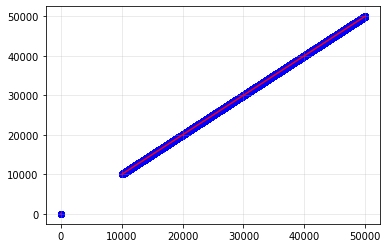

In [375]:
#plt.xlim(10.9, 11.3)
#plt.ylim(10.9, 11.2)

plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test,y_pred, color="red")

plt.grid(alpha=0.3)
plt.show()

## Escribir dentro de S3

In [270]:
key = 'xetra_daily_report_' + datetime.today().strftime("%Y%m%d_%H%M%S") + '.parquet'

In [271]:
out_buffer = BytesIO()
df_all.to_parquet(out_buffer, index=False)
bucket_target = s3.Bucket('xetra-bucket-rizo1')
bucket_target.put_object(Body=out_buffer.getvalue(), Key=key)

s3.Object(bucket_name='xetra-bucket-rizo1', key='xetra_daily_report_20220302_222745.parquet')

## Lectura del archivo subido

In [381]:
for obj in bucket_target.objects.all():
       print(obj.key)

xetra_daily_report_20220219_002307.parquet
xetra_daily_report_20220219_193113.parquet
xetra_daily_report_20220228_205347.parquet
xetra_daily_report_20220302_222745.parquet


In [382]:
prq_obj = bucket_target.Object(key='xetra_daily_report_20220302_222745.parquet').get().get('Body').read()
data = BytesIO(prq_obj)
df_report = pd.read_parquet(data)

In [380]:
df_report

,ISIN,Date,Time,StartPrice,EndPrice,std,EndPrice_MXN
0,AT0000A0E9W5,2022-02-28,08:00,13.880,13.8800,0.000000,318.40720
1,DE000A0DJ6J9,2022-02-28,08:00,29.000,29.1400,0.098995,668.47160
2,DE000A0D6554,2022-02-28,08:00,13.760,13.8000,0.028284,316.57200
3,DE000A0D9PT0,2022-02-28,08:00,212.000,210.6000,0.989949,4831.16400
4,DE000A0JL9W6,2022-02-28,08:00,66.200,66.2500,0.035355,1519.77500
...,...,...,...,...,...,...,...
178697,IE00BMFNW783,2022-03-02,12:00,5.780,5.7850,0.003536,132.70790
178698,DE000A3CQ7F4,2022-03-02,12:00,10.270,10.2700,0.000000,235.59380
178699,IE000H1H16W5,2022-03-02,12:00,4.406,4.4115,0.003889,101.19981
178700,LU2278080713,2022-03-02,12:00,10.042,10.0420,0.000000,230.36348
